In [1]:
import xlsxwriter

In [2]:
import os
import pandas as pd

# Absolute path to the project directory
PROJECT_DIR = os.path.abspath("..")
PROJECT_DIR


'd:\\PersonalProjects\\TFG\\TFG-UHI Barcelona'

In [3]:
RAW_AEMET_DIR = os.path.join(PROJECT_DIR, "data", "raw", "aemet")
RAW_AEMET_DIR

os.listdir(RAW_AEMET_DIR)


['aemet_bcnairport_0076_1980_2025_resume.csv',
 'aemet_vpenedes_0066X_1980_2025_resume.csv',
 'aemet_manresa_0149X_1980_2025_resume.csv',
 'aemet_bcndrassanes_0201X_1980_2025_resume.csv',
 'aemet_montserrat_0158O_1980_2025_resume.csv',
 'aemet_igualada_0171X_1980_2025_resume.csv',
 'aemet_bcnfabra_0200E_1980_2025_resume.csv',
 'aemet_sabadellairport_0229I_1980_2025_resume.csv']

In [4]:
# List all CSV files in the RAW_AEMET_DIR
files = [f for f in os.listdir(RAW_AEMET_DIR) if f.endswith(".csv")]
files


['aemet_bcnairport_0076_1980_2025_resume.csv',
 'aemet_vpenedes_0066X_1980_2025_resume.csv',
 'aemet_manresa_0149X_1980_2025_resume.csv',
 'aemet_bcndrassanes_0201X_1980_2025_resume.csv',
 'aemet_montserrat_0158O_1980_2025_resume.csv',
 'aemet_igualada_0171X_1980_2025_resume.csv',
 'aemet_bcnfabra_0200E_1980_2025_resume.csv',
 'aemet_sabadellairport_0229I_1980_2025_resume.csv']

In [5]:
dfs = []

for fname in files:
    path = os.path.join(RAW_AEMET_DIR, fname)
    df = pd.read_csv(path)
    
    # Add column with filename
    df["archivo"] = fname
    # If filename is "estacion_12345.csv", extract "12345"
    dfs.append(df)

meteo = pd.concat(dfs, ignore_index=True)

meteo.head()


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,archivo
0,1980-01-01,76,BARCELONA AEROPUERTO,BARCELONA,4.0,11.7,0.0,7.2,04:55,16.2,...,1015.7,00,1008.5,15,70.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
1,1980-01-02,76,BARCELONA AEROPUERTO,BARCELONA,4.0,11.5,0.0,7.8,Varias,15.2,...,1022.8,24,1009.1,Varias,69.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
2,1980-01-03,76,BARCELONA AEROPUERTO,BARCELONA,4.0,8.7,0.0,3.0,23:50,14.4,...,1024.7,12,1022.5,24,77.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
3,1980-01-04,76,BARCELONA AEROPUERTO,BARCELONA,4.0,8.1,0.0,2.4,05:00,13.8,...,1022.5,00,1016.8,24,77.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
4,1980-01-05,76,BARCELONA AEROPUERTO,BARCELONA,4.0,8.6,NaN,4.2,04:00,13.0,...,1017.7,Varias,1015.3,Varias,70.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv


In [6]:
# Date column to datetime
meteo["fecha"] = pd.to_datetime(meteo["fecha"], errors="coerce")

# Numeric columns
num_cols = ["tmed","tmax","tmin","prec","sol","hrMedia","presMax","presMin","altitud"]
for col in num_cols:
    if col in meteo.columns:
        meteo[col] = pd.to_numeric(meteo[col], errors="coerce")

meteo.head()


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,archivo
0,1980-01-01,76,BARCELONA AEROPUERTO,BARCELONA,4.0,11.7,0.0,7.2,04:55,16.2,...,1015.7,00,1008.5,15,70.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
1,1980-01-02,76,BARCELONA AEROPUERTO,BARCELONA,4.0,11.5,0.0,7.8,Varias,15.2,...,1022.8,24,1009.1,Varias,69.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
2,1980-01-03,76,BARCELONA AEROPUERTO,BARCELONA,4.0,8.7,0.0,3.0,23:50,14.4,...,1024.7,12,1022.5,24,77.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
3,1980-01-04,76,BARCELONA AEROPUERTO,BARCELONA,4.0,8.1,0.0,2.4,05:00,13.8,...,1022.5,00,1016.8,24,77.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv
4,1980-01-05,76,BARCELONA AEROPUERTO,BARCELONA,4.0,8.6,NaN,4.2,04:00,13.0,...,1017.7,Varias,1015.3,Varias,70.0,NaN,NaN,NaN,NaN,aemet_bcnairport_0076_1980_2025_resume.csv


In [7]:
# Unique station names
meteo["nombre"].unique()


array(['BARCELONA AEROPUERTO', 'VILAFRANCA DEL PENEDÈS', nan, 'MANRESA',
       'BARCELONA, DRASSANES', 'MONTSERRAT', 'IGUALADA',
       'BARCELONA, FABRA', 'SABADELL AEROPUERTO'], dtype=object)

In [8]:
# Delete rows with missing fecha or all temperature values missing
meteo = meteo.dropna(subset=["fecha"])
meteo = meteo.dropna(subset=["tmed", "tmax", "tmin"], how="all")


In [9]:
# Add year column and sort values
meteo["year"] = meteo["fecha"].dt.year
meteo = meteo.sort_values(["nombre", "fecha"])


In [10]:
# Count valid days per year and station
valid_years = (
    meteo.groupby(["nombre", "year"])["tmed"]
    .count()
    .reset_index()
    .rename(columns={"tmed": "days"})
)

# Complete years have at least 250 valid days
valid_years = valid_years[valid_years["days"] >= 250]

# Merge to keep only valid years
meteo_clean = meteo.merge(valid_years[["nombre","year"]], on=["nombre","year"])


In [11]:
# Annual mean tmed, tmax, tmin per station
annual_temp = (
    meteo_clean.groupby(["nombre", "year"], as_index=False)[["tmed", "tmax", "tmin"]]
    .mean()
)


annual_temp.head()


,nombre,year,tmed,tmax,tmin
0,BARCELONA AEROPUERTO,1980,15.086612,19.818033,10.355738
1,BARCELONA AEROPUERTO,1981,15.627397,20.329315,10.925753
2,BARCELONA AEROPUERTO,1982,15.909315,20.306301,11.512055
3,BARCELONA AEROPUERTO,1983,15.787397,20.457808,11.117260
4,BARCELONA AEROPUERTO,1984,14.755464,19.557377,9.955191


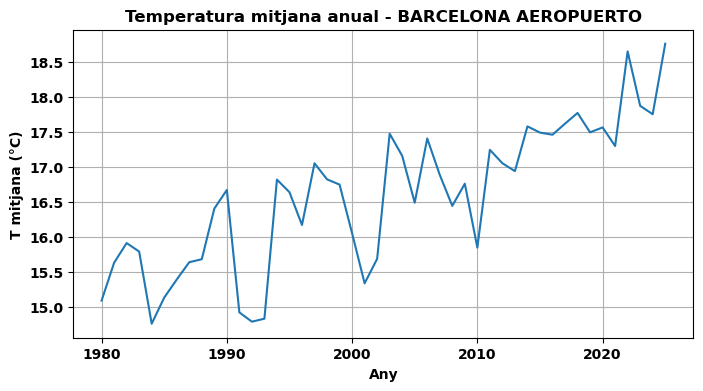

In [12]:
# Mean temp annual for barcelona airport
import matplotlib.pyplot as plt

station = "BARCELONA AEROPUERTO"

aero = annual_temp[annual_temp["nombre"] == station]

plt.figure(figsize=(8,4))
plt.plot(aero["year"], aero["tmed"])
plt.title(f"Temperatura mitjana anual - {station}")
plt.xlabel("Any")
plt.ylabel("T mitjana (°C)")
plt.grid(True)
plt.show()


In [13]:
# Barcelona stations list
stations_barcelona = [
    "BARCELONA AEROPUERTO",
    "BARCELONA, FABRA",
    "BARCELONA, DRASSANES",
    "MONTSERRAT",
    "SABADELL AEROPUERTO"
]  

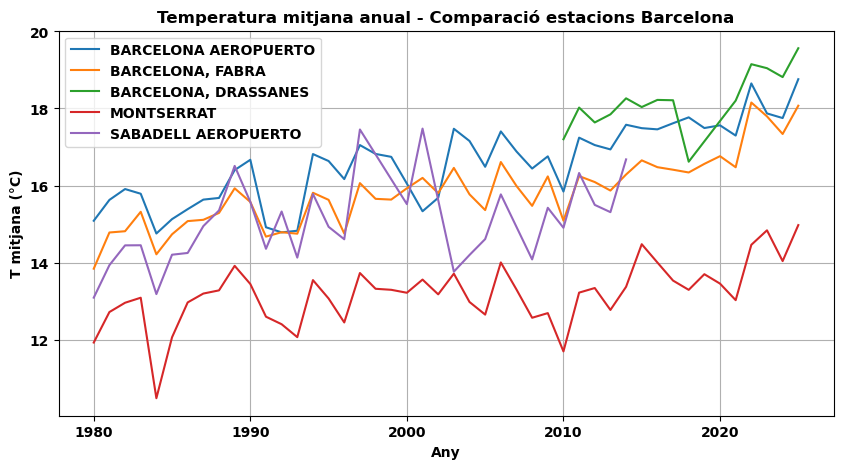

In [14]:
subset = annual_temp[annual_temp["nombre"].isin(stations_barcelona)]

# Absolute path to reports/temp directory
BASE_DIR = os.path.dirname(os.getcwd())   
REPORTS_DIR = os.path.join(BASE_DIR, "reports", "temp")

# Create reports/temp directory if it doesn't exist
os.makedirs(REPORTS_DIR, exist_ok=True)

plt.figure(figsize=(10,5))

for st in stations_barcelona:
    data_st = subset[subset["nombre"] == st]
    plt.plot(data_st["year"], data_st["tmed"], label=st)

plt.title("Temperatura mitjana anual - Comparació estacions Barcelona")
plt.xlabel("Any")
plt.ylabel("T mitjana (°C)")
plt.grid(True)
plt.legend()

REPORTS_PATH = os.path.join(REPORTS_DIR, "temperatura_mitjana_estacions_barcelona.png")
plt.savefig(REPORTS_PATH, dpi=300, bbox_inches="tight")
plt.show()

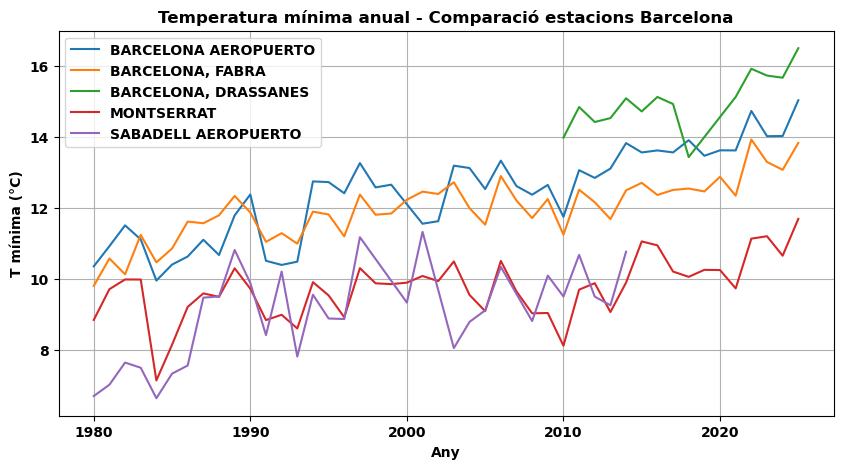

In [15]:
# Temp minimum annual for Barcelona stations (UHI analysis)
plt.figure(figsize=(10,5))

for st in stations_barcelona:
    data_st = subset[subset["nombre"] == st]
    plt.plot(data_st["year"], data_st["tmin"], label=st)

plt.title("Temperatura mínima anual - Comparació estacions Barcelona")
plt.xlabel("Any")
plt.ylabel("T mínima (°C)")
plt.grid(True)
plt.legend()

REPORTS_PATH = os.path.join(REPORTS_DIR, "temperatura_mínima_mitjana_estacions_barcelona.png")
plt.savefig(REPORTS_PATH, dpi=300, bbox_inches="tight")
plt.show()


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot linear trend for a given station and variable
def plot_linear_trend(df, station_name, variable="tmed"):
    data = df[df["nombre"] == station_name].dropna(subset=[variable])
    
    years = data["year"].values
    values = data[variable].values

    slope, intercept = np.polyfit(years, values, 1)
    trend = slope * years + intercept

    plt.figure(figsize=(10,5))
    plt.plot(years, values, label=f"{variable.upper()} anual")
    plt.plot(years, trend, linestyle="--", label=f"Tendència ({slope:.3f} °C/any)")
    plt.title(f"{station_name} – Tendència {variable.upper()}")
    plt.xlabel("Any")
    plt.ylabel(f"{variable.upper()} (°C)")
    plt.grid(True)
    plt.legend()
    # --- Save ---
    filename = f"{station_name.replace(',', '').replace(' ', '_')}_{variable}_trend.png"
    save_path = os.path.join(REPORTS_DIR, filename)

    plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()

    print(
        f"📈 {station_name} – pendent de tendència ({variable}): "
        f"{slope:.3f} °C/any ({slope*10:.2f} °C/dècada)"
    )



In [17]:
# Function for barcelona airport
# plot_linear_trend(annual_temp, "BARCELONA AEROPUERTO", variable="tmed")
# plot_linear_trend(annual_temp, "BARCELONA, FABRA", variable="tmed")
# plot_linear_trend(annual_temp, "BARCELONA, DRASSANES", variable="tmed")
# plot_linear_trend(annual_temp, "MONTSERRAT", variable="tmed")
# plot_linear_trend(annual_temp, "SABADELL AEROPUERTO", variable="tmed")
#--- IGNORE ----


===== BARCELONA AEROPUERTO - tmed =====


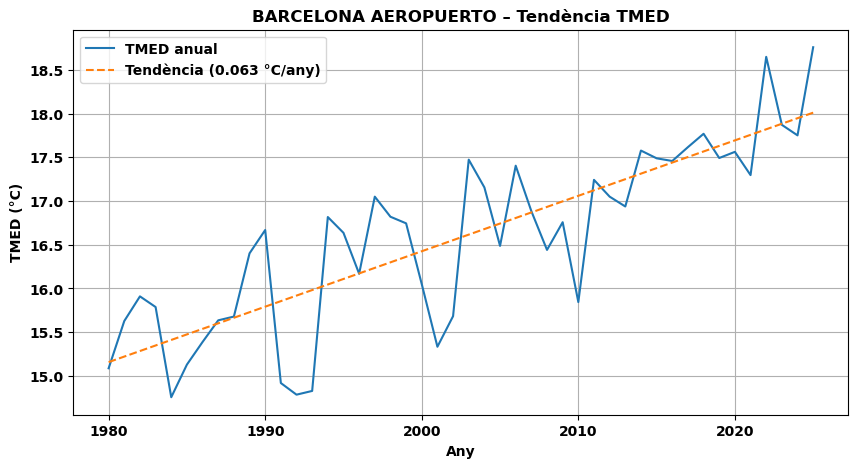

📈 BARCELONA AEROPUERTO – pendent de tendència (tmed): 0.063 °C/any (0.63 °C/dècada)

===== BARCELONA AEROPUERTO - tmin =====


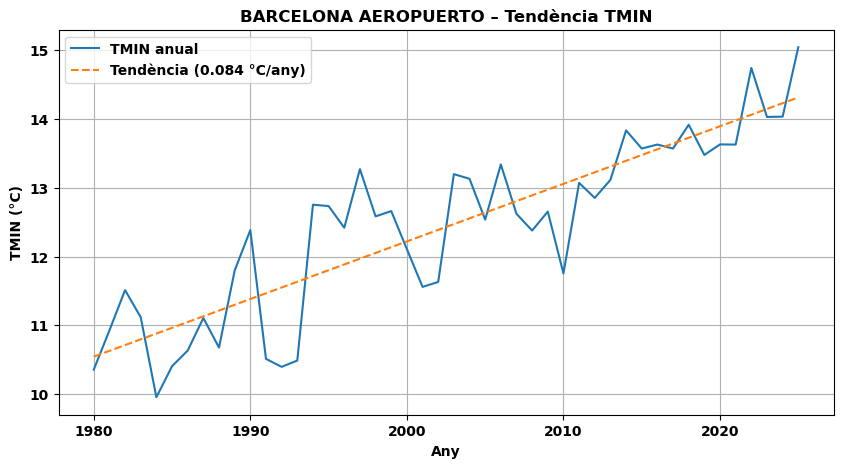

📈 BARCELONA AEROPUERTO – pendent de tendència (tmin): 0.084 °C/any (0.84 °C/dècada)

===== BARCELONA AEROPUERTO - tmax =====


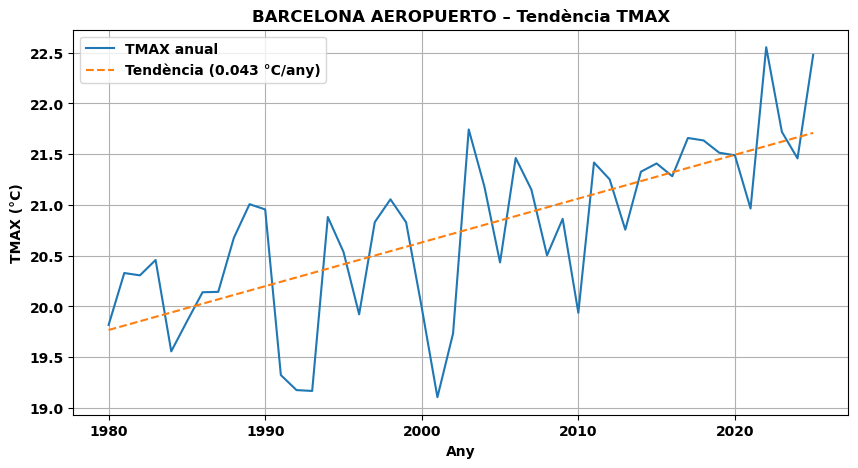

📈 BARCELONA AEROPUERTO – pendent de tendència (tmax): 0.043 °C/any (0.43 °C/dècada)

===== BARCELONA, FABRA - tmed =====


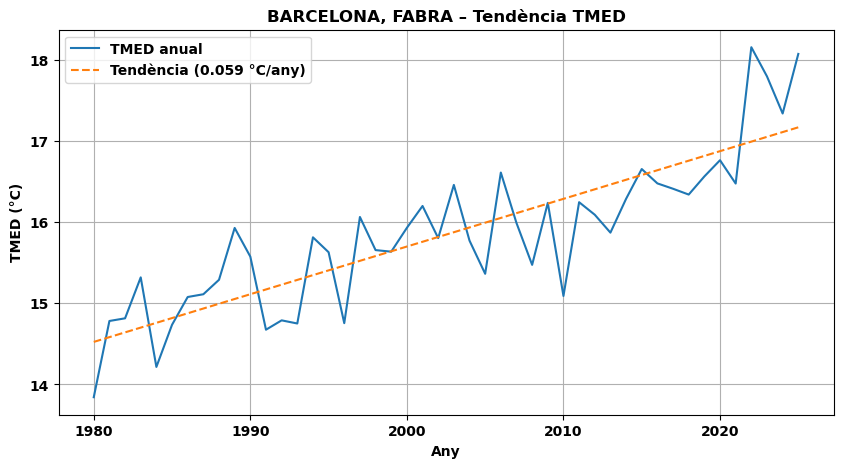

📈 BARCELONA, FABRA – pendent de tendència (tmed): 0.059 °C/any (0.59 °C/dècada)

===== BARCELONA, FABRA - tmin =====


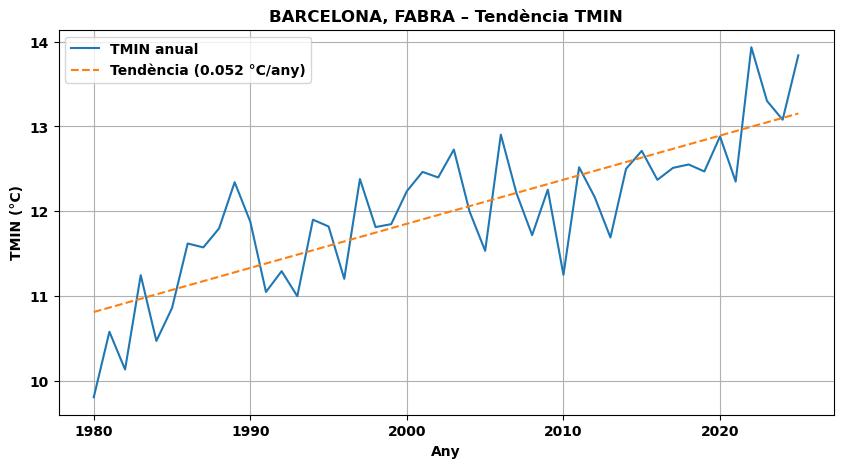

📈 BARCELONA, FABRA – pendent de tendència (tmin): 0.052 °C/any (0.52 °C/dècada)

===== BARCELONA, FABRA - tmax =====


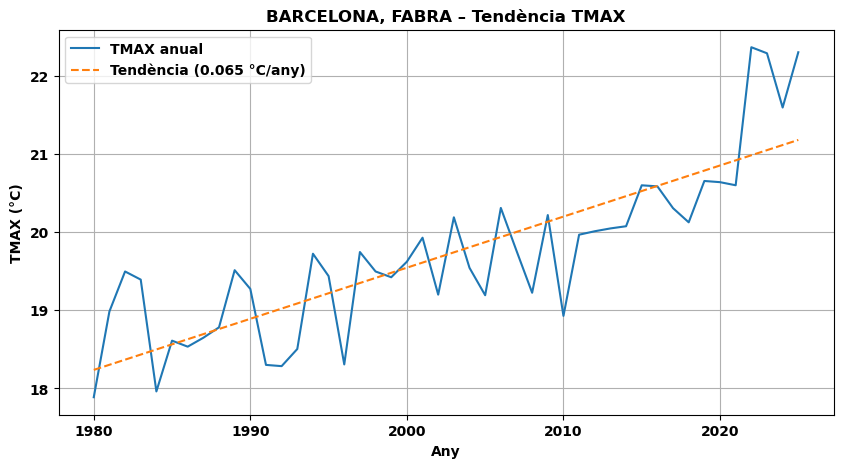

📈 BARCELONA, FABRA – pendent de tendència (tmax): 0.065 °C/any (0.65 °C/dècada)

===== BARCELONA, DRASSANES - tmed =====


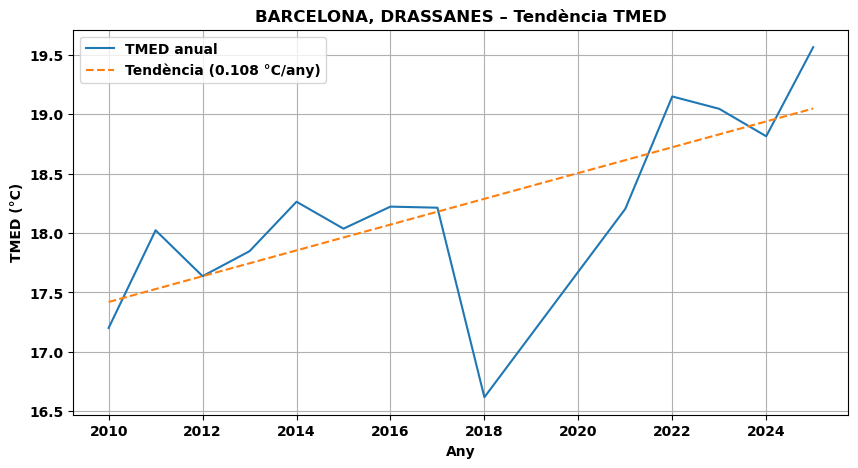

📈 BARCELONA, DRASSANES – pendent de tendència (tmed): 0.108 °C/any (1.08 °C/dècada)

===== BARCELONA, DRASSANES - tmin =====


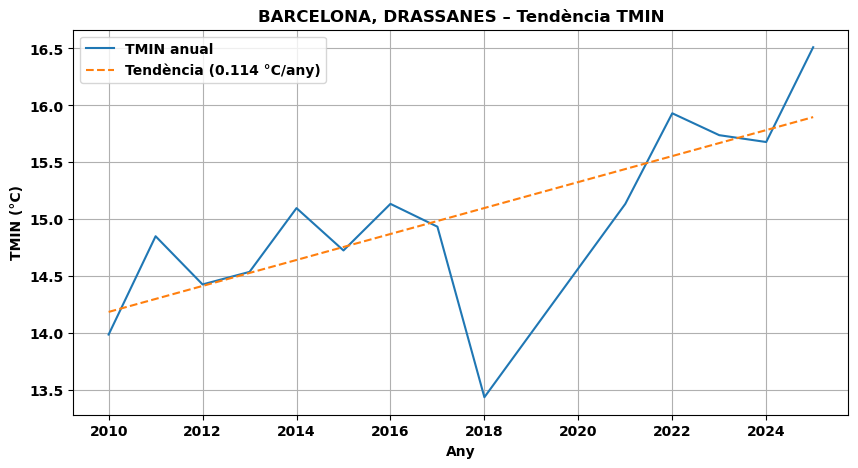

📈 BARCELONA, DRASSANES – pendent de tendència (tmin): 0.114 °C/any (1.14 °C/dècada)

===== BARCELONA, DRASSANES - tmax =====


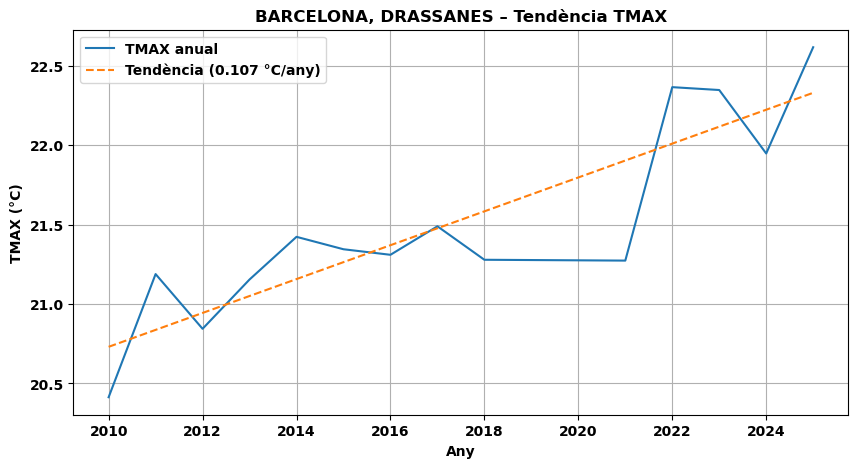

📈 BARCELONA, DRASSANES – pendent de tendència (tmax): 0.107 °C/any (1.07 °C/dècada)

===== MONTSERRAT - tmed =====


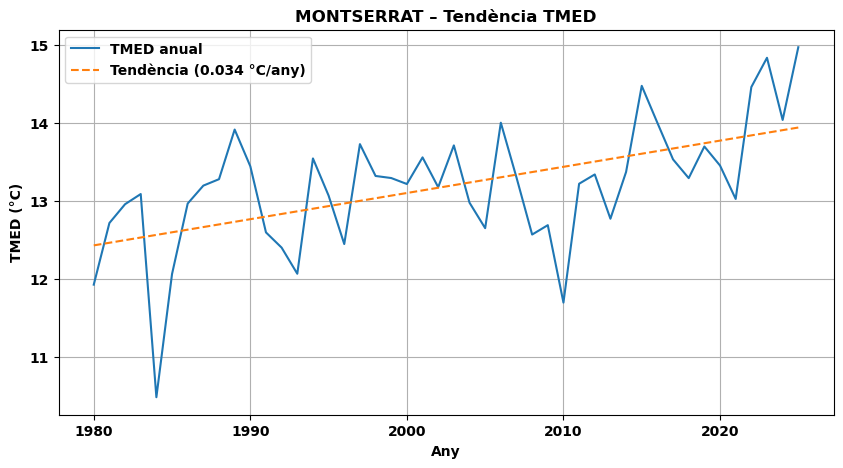

📈 MONTSERRAT – pendent de tendència (tmed): 0.034 °C/any (0.34 °C/dècada)

===== MONTSERRAT - tmin =====


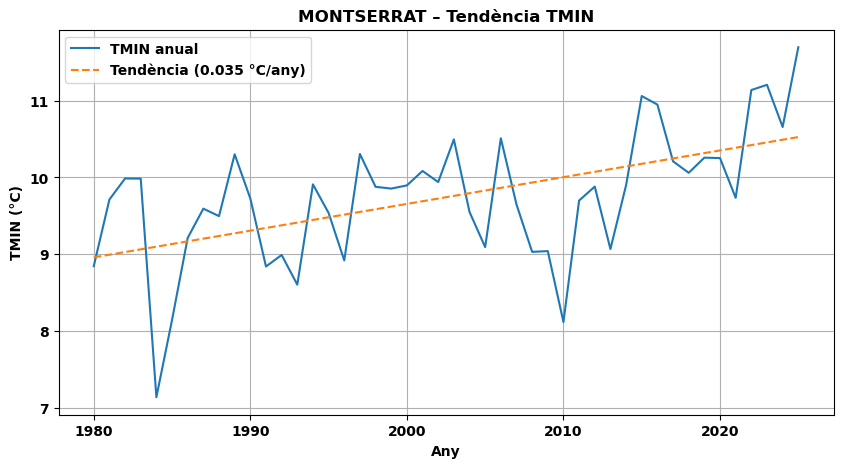

📈 MONTSERRAT – pendent de tendència (tmin): 0.035 °C/any (0.35 °C/dècada)

===== MONTSERRAT - tmax =====


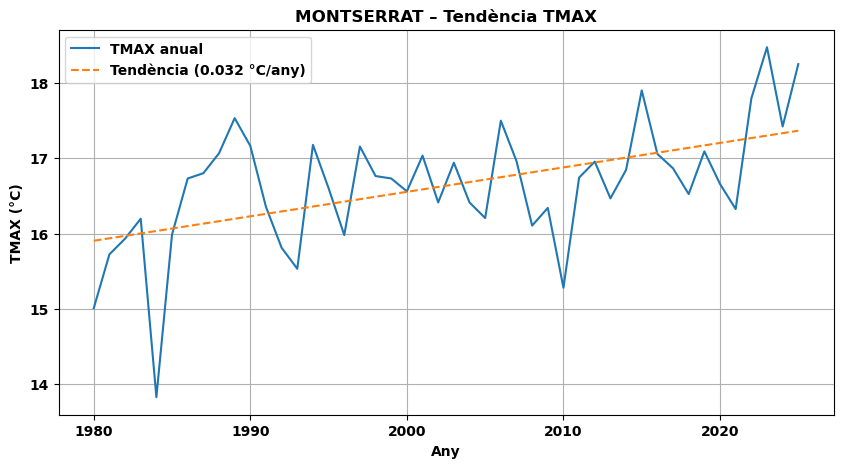

📈 MONTSERRAT – pendent de tendència (tmax): 0.032 °C/any (0.32 °C/dècada)

===== SABADELL AEROPUERTO - tmed =====


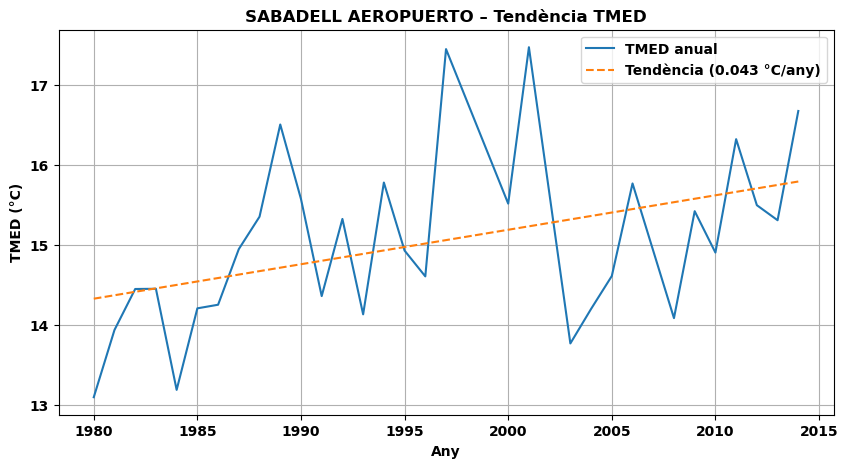

📈 SABADELL AEROPUERTO – pendent de tendència (tmed): 0.043 °C/any (0.43 °C/dècada)

===== SABADELL AEROPUERTO - tmin =====


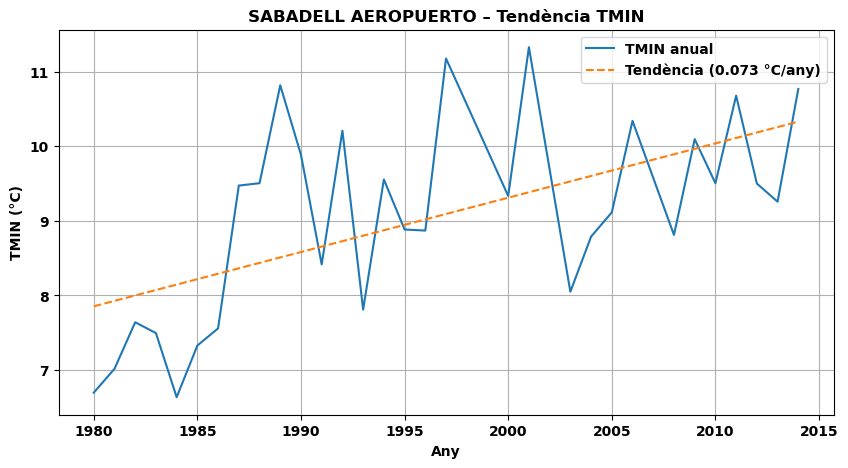

📈 SABADELL AEROPUERTO – pendent de tendència (tmin): 0.073 °C/any (0.73 °C/dècada)

===== SABADELL AEROPUERTO - tmax =====


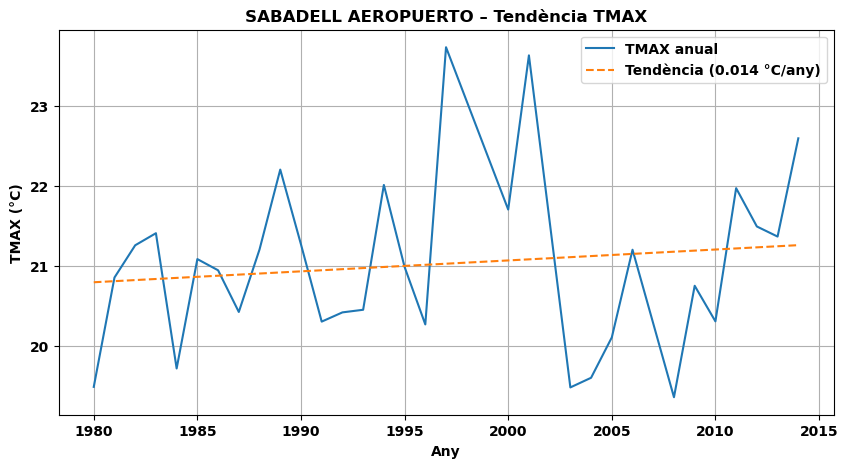

📈 SABADELL AEROPUERTO – pendent de tendència (tmax): 0.014 °C/any (0.14 °C/dècada)


In [18]:
# All tends
for st in stations_barcelona:
    for var in ["tmed", "tmin", "tmax"]:
        print(f"\n===== {st} - {var} =====")
        plot_linear_trend(annual_temp, st, variable=var)

In [19]:
# Defining urban, suburban and rural stations
urban = ["BARCELONA, DRASSANES", "BARCELONA, FABRA"] # FABRA 408m Collserola
rural = ["MONTSERRAT"]   # 738m
periurban = ["BARCELONA AEROPUERTO", "SABADELL AEROPUERTO"]

In [20]:

# Route to reports/uhi_climatology
UHI_CLIM_DIR = os.path.join(BASE_DIR, "reports", "uhi_climatology")

# Create folder if it doesn't exist
os.makedirs(UHI_CLIM_DIR, exist_ok=True)

print("Absolute route created:", UHI_CLIM_DIR)


Absolute route created: d:\PersonalProjects\TFG\TFG-UHI Barcelona\reports\uhi_climatology


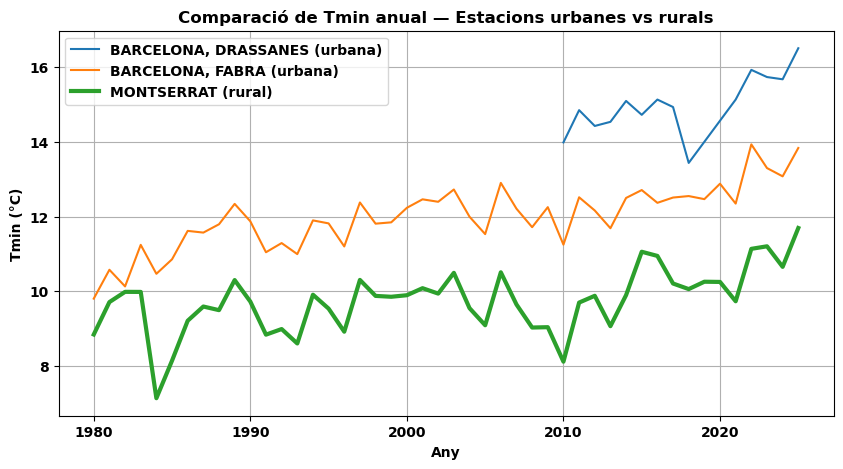

In [21]:

# Tmin annual urbans vs rural 

plt.figure(figsize=(10,5))

for st in urban:
    data = annual_temp[annual_temp["nombre"] == st]
    plt.plot(data["year"], data["tmin"], label=f"{st} (urbana)")

for st in rural:
    data = annual_temp[annual_temp["nombre"] == st]
    plt.plot(data["year"], data["tmin"], label=f"{st} (rural)", linewidth=3)

plt.title("Comparació de Tmin anual — Estacions urbanes vs rurals")
plt.xlabel("Any")
plt.ylabel("Tmin (°C)")
plt.grid(True)
plt.legend()

UHI_PATH = os.path.join(UHI_CLIM_DIR, "tmin_annual_urban_rural_comparison.png")
plt.savefig(UHI_PATH, dpi=300, bbox_inches="tight")
plt.show()


In [22]:
"""UHI climatology formula: UHI = T_urban - T_rural
Example: UHI_Drassanes = Tmin_Drassanes - Tmin_Montserrat"""

# Function to compute UHI between urban and rural stations
def compute_uhi(annual_temp, urban_station, rural_station="MONTSERRAT"):
    urb = annual_temp[annual_temp["nombre"] == urban_station][["year", "tmin"]].rename(columns={"tmin": "tmin_urb"})
    rur = annual_temp[annual_temp["nombre"] == rural_station][["year", "tmin"]].rename(columns={"tmin": "tmin_rur"})

    merged = pd.merge(urb, rur, on="year", how="inner")
    merged["UHI"] = merged["tmin_urb"] - merged["tmin_rur"]
    return merged

uhi_drassanes = compute_uhi(annual_temp, "BARCELONA, DRASSANES")
uhi_fabra = compute_uhi(annual_temp, "BARCELONA, FABRA")


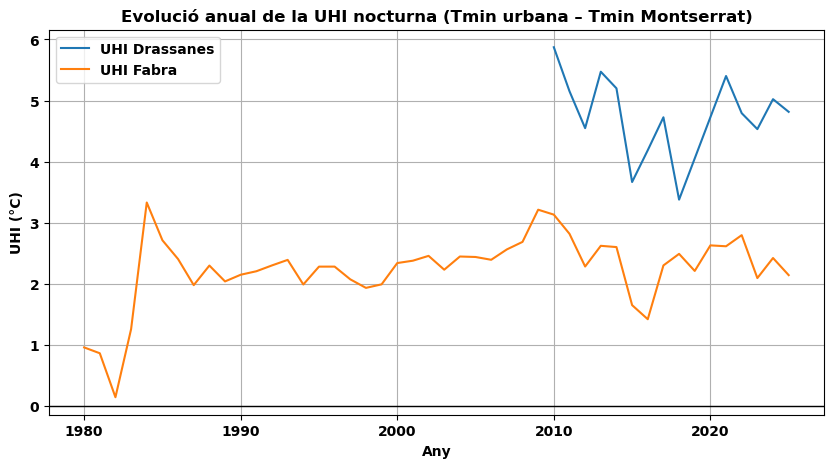

In [23]:
# Plot UHI trends
plt.figure(figsize=(10,5))
plt.plot(uhi_drassanes["year"], uhi_drassanes["UHI"], label="UHI Drassanes")
plt.plot(uhi_fabra["year"], uhi_fabra["UHI"], label="UHI Fabra")
plt.axhline(0, color="black", linewidth=1)
plt.title("Evolució anual de la UHI nocturna (Tmin urbana – Tmin Montserrat)")
plt.xlabel("Any")
plt.ylabel("UHI (°C)")
plt.legend()
plt.grid(True)

UHI_PATH = os.path.join(UHI_CLIM_DIR, "uhi_comparison_urban_stations_with_rural.png")
plt.savefig(UHI_PATH, dpi=300, bbox_inches="tight")
plt.show()


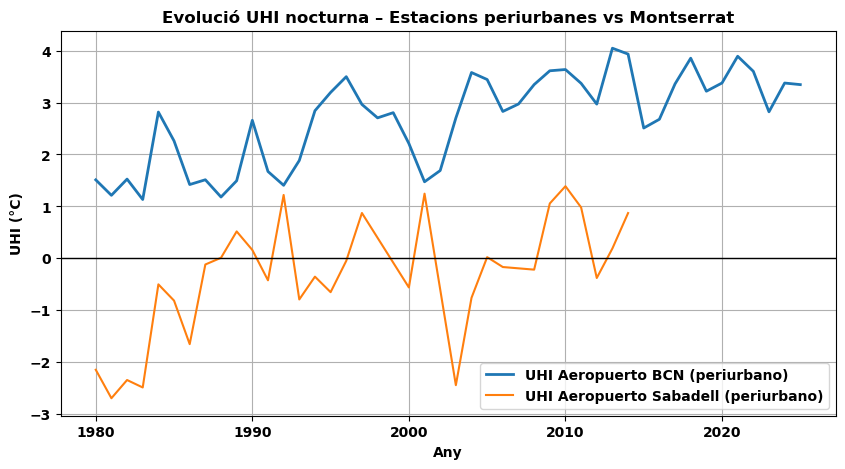

In [24]:
# UHI for peri-urban stations
uhi_bcn_airport = compute_uhi(annual_temp, "BARCELONA AEROPUERTO", rural_station="MONTSERRAT")
uhi_sabadell = compute_uhi(annual_temp, "SABADELL AEROPUERTO", rural_station="MONTSERRAT")

plt.figure(figsize=(10,5))

# Barcelona Airport
plt.plot(
    uhi_bcn_airport["year"],
    uhi_bcn_airport["UHI"],
    label="UHI Aeropuerto BCN (periurbano)",
    linewidth=2
)

# Sabadell Airport
plt.plot(
    uhi_sabadell["year"],
    uhi_sabadell["UHI"],
    label="UHI Aeropuerto Sabadell (periurbano)"
)

plt.axhline(0, color="black", linewidth=1)
plt.title("Evolució UHI nocturna – Estacions periurbanes vs Montserrat")
plt.xlabel("Any")
plt.ylabel("UHI (°C)")
plt.grid(True)
plt.legend()

UHI_PATH = os.path.join(UHI_CLIM_DIR, "uhi_comparison_periurban_stations_with_rural.png")
plt.savefig(UHI_PATH, dpi=300, bbox_inches="tight")
plt.show()



In [25]:
# Function to compute UHI trend
def compute_uhi_trend(uhi_df, station_name):
    """
    uhi_df must have columns: year, UHI
    station_name urban/periferic
    """
    df = uhi_df.dropna(subset=["UHI"])
    
    years = df["year"].values
    uhi_values = df["UHI"].values
    
    # Linear fit
    slope, intercept = np.polyfit(years, uhi_values, 1)
    
    print(f"📈 Tendencia UHI nocturna – {station_name}")
    print(f"   Pendent: {slope:.3f} °C/any  →  {slope*10:.2f} °C/dècada")
    print(f"   UHI mitjana: {df['UHI'].mean():.2f} °C")
    print(f"   Anys analitzats: {df['year'].min()}–{df['year'].max()}")
    print("-"*60)


In [26]:
# Function to compute UHI between urban and rural stations
def compute_uhi(annual, urban_station, rural_station="MONTSERRAT"):
    urb = annual[annual["nombre"] == urban_station][["year", "tmin"]].rename(columns={"tmin": "tmin_urb"})
    rur = annual[annual["nombre"] == rural_station][["year", "tmin"]].rename(columns={"tmin": "tmin_rur"})
    merged = pd.merge(urb, rur, on="year", how="inner")
    merged["UHI"] = merged["tmin_urb"] - merged["tmin_rur"]
    merged["station"] = urban_station
    return merged

uhi_drassanes = compute_uhi(annual_temp, "BARCELONA, DRASSANES")
uhi_fabra = compute_uhi(annual_temp, "BARCELONA, FABRA")
uhi_bcn_airport = compute_uhi(annual_temp, "BARCELONA AEROPUERTO")
uhi_sabadell = compute_uhi(annual_temp, "SABADELL AEROPUERTO")


In [27]:
compute_uhi_trend(uhi_drassanes, "Barcelona Drassanes (urbana)")

compute_uhi_trend(uhi_fabra, "Barcelona Fabra (urbana elevada)")

compute_uhi_trend(uhi_bcn_airport, "Aeropuerto Barcelona (periurbana costera)")

compute_uhi_trend(uhi_sabadell, "Aeropuerto Sabadell (valle periurbano)")


📈 Tendencia UHI nocturna – Barcelona Drassanes (urbana)
   Pendent: -0.025 °C/any  →  -0.25 °C/dècada
   UHI mitjana: 4.77 °C
   Anys analitzats: 2010–2025
------------------------------------------------------------
📈 Tendencia UHI nocturna – Barcelona Fabra (urbana elevada)
   Pendent: 0.017 °C/any  →  0.17 °C/dècada
   UHI mitjana: 2.24 °C
   Anys analitzats: 1980–2025
------------------------------------------------------------
📈 Tendencia UHI nocturna – Aeropuerto Barcelona (periurbana costera)
   Pendent: 0.049 °C/any  →  0.49 °C/dècada
   UHI mitjana: 2.69 °C
   Anys analitzats: 1980–2025
------------------------------------------------------------
📈 Tendencia UHI nocturna – Aeropuerto Sabadell (valle periurbano)
   Pendent: 0.062 °C/any  →  0.62 °C/dècada
   UHI mitjana: -0.36 °C
   Anys analitzats: 1980–2014
------------------------------------------------------------


In [28]:
# Function to compute UHI statistics
def uhi_stats(uhi_df, station_name):
    df = uhi_df.dropna(subset=["UHI"]).copy()
    years = df["year"].values
    uhi_values = df["UHI"].values
    
    # Tendencia lineal
    slope, intercept = np.polyfit(years, uhi_values, 1)
    
    stats = {
        "Estació": station_name,
        "UHI_mitjana": df["UHI"].mean(),
        "UHI_max": df["UHI"].max(),
        "UHI_min": df["UHI"].min(),
        "Pendent_C_any": slope,
        "Pendent_C_dècada": slope * 10,
        "Periode": f"{df['year'].min()}–{df['year'].max()}",
        "N_anys": df.shape[0]
    }
    return stats


In [29]:
import pandas as pd

stats_list = []

stats_list.append(uhi_stats(uhi_drassanes, "Barcelona Drassanes (urbana)"))
stats_list.append(uhi_stats(uhi_fabra, "Barcelona Fabra (urbana elevada)"))
stats_list.append(uhi_stats(uhi_bcn_airport, "Aeropuerto Barcelona (periurbana costera)"))
stats_list.append(uhi_stats(uhi_sabadell, "Aeropuerto Sabadell (valle periurbano)"))

uhi_summary = pd.DataFrame(stats_list)
uhi_summary


,Estació,UHI_mitjana,UHI_max,UHI_min,Pendent_C_any,Pendent_C_dècada,Periode,N_anys
0,Barcelona Drassanes (urbana),4.769146,5.872419,3.378726,-0.025001,-0.250014,2010–2025,14
1,Barcelona Fabra (urbana elevada),2.239586,3.331601,0.145753,0.017235,0.172348,1980–2025,46
2,Aeropuerto Barcelona (periurbana costera),2.686416,4.047527,1.132538,0.048894,0.488943,1980–2025,46
3,Aeropuerto Sabadell (valle periurbano),-0.356039,1.388779,-2.695890,0.061763,0.617634,1980–2014,31


In [30]:
# Going to export UHI summary to CSV

cols_order = [
    "Estació",
    "UHI_mitjana",
    "UHI_max",
    "UHI_min",
    "Pendent_C_dècada",
    "Pendent_C_any",
    "Periode",
    "N_anys"
]

uhi_pretty = uhi_summary[cols_order].copy()

# Round numeric columns to 2 decimals
num_cols = ["UHI_mitjana", "UHI_max", "UHI_min", "Pendent_C_dècada", "Pendent_C_any"]
uhi_pretty[num_cols] = uhi_pretty[num_cols].round(2)

uhi_pretty


,Estació,UHI_mitjana,UHI_max,UHI_min,Pendent_C_dècada,Pendent_C_any,Periode,N_anys
0,Barcelona Drassanes (urbana),4.77,5.87,3.38,-0.25,-0.03,2010–2025,14
1,Barcelona Fabra (urbana elevada),2.24,3.33,0.15,0.17,0.02,1980–2025,46
2,Aeropuerto Barcelona (periurbana costera),2.69,4.05,1.13,0.49,0.05,1980–2025,46
3,Aeropuerto Sabadell (valle periurbano),-0.36,1.39,-2.70,0.62,0.06,1980–2014,31


In [31]:
uhi_pretty.style\
    .hide(axis="index")\
    .set_caption("Resum de la UHI nocturna per estació (Tmin urbana – Tmin Montserrat)")\
    .format({
        "UHI_mitjana": "{:.2f}",
        "UHI_max": "{:.2f}",
        "UHI_min": "{:.2f}",
        "Pendent_C_dècada": "{:.2f}",
        "Pendent_C_any": "{:.3f}",
    })\
    .background_gradient(subset=["UHI_mitjana"], cmap="Reds")\
    .background_gradient(subset=["Pendent_C_dècada"], cmap="coolwarm")


Estació,UHI_mitjana,UHI_max,UHI_min,Pendent_C_dècada,Pendent_C_any,Periode,N_anys
Barcelona Drassanes (urbana),4.77,5.87,3.38,-0.25,-0.030,2010–2025,14
Barcelona Fabra (urbana elevada),2.24,3.33,0.15,0.17,0.020,1980–2025,46
Aeropuerto Barcelona (periurbana costera),2.69,4.05,1.13,0.49,0.050,1980–2025,46
Aeropuerto Sabadell (valle periurbano),-0.36,1.39,-2.70,0.62,0.060,1980–2014,31


In [32]:
import os

REPORTS_DIR = os.path.abspath("../reports/uhi_climatology")
os.makedirs(REPORTS_DIR, exist_ok=True)

csv_path = os.path.join(REPORTS_DIR, "uhi_summary.csv")
uhi_pretty.to_csv(csv_path, index=False)

csv_path


'd:\\PersonalProjects\\TFG\\TFG-UHI Barcelona\\reports\\uhi_climatology\\uhi_summary.csv'

In [33]:

excel_path = os.path.join(REPORTS_DIR, "uhi_summary.xlsx")

with pd.ExcelWriter(excel_path, engine="xlsxwriter") as writer:
    uhi_pretty.to_excel(writer, sheet_name="UHI", index=False)
    
    workbook  = writer.book
    worksheet = writer.sheets["UHI"]
    
    # Adjust column widths
    for i, col in enumerate(uhi_pretty.columns):
        max_len = max(
            uhi_pretty[col].astype(str).map(len).max(),
            len(col)
        )
        worksheet.set_column(i, i, max_len + 2)

excel_path


'd:\\PersonalProjects\\TFG\\TFG-UHI Barcelona\\reports\\uhi_climatology\\uhi_summary.xlsx'

In [34]:
# Now Daily temperature range (DTR = Tmax - Tmin) analysis
meteo_clean["ATD"] = meteo_clean["tmax"] - meteo_clean["tmin"]

# DTR annual per station
annual_atd = (
    meteo_clean
    .groupby(["nombre", "year"], as_index=False)["ATD"]
    .mean()
)

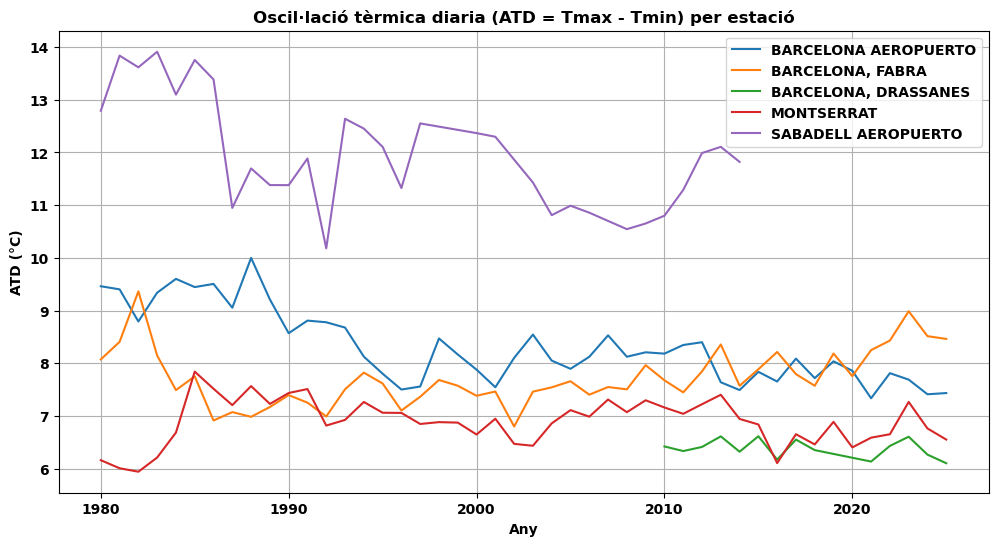

In [35]:
plt.figure(figsize=(12,6))

for st in stations_barcelona:
    df = annual_atd[annual_atd["nombre"] == st]
    plt.plot(df["year"], df["ATD"], label=st)

plt.title("Oscil·lació tèrmica diaria (ATD = Tmax - Tmin) per estació")
plt.xlabel("Any")
plt.ylabel("ATD (°C)")
plt.grid(True)
plt.legend()
plt.show()

In [36]:
def atd_trend(annual_atd, station_name):
    df = annual_atd[annual_atd["nombre"] == station_name].dropna(subset=["ATD"])
    
    years = df["year"].values
    atd_vals = df["ATD"].values

    slope, intercept = np.polyfit(years, atd_vals, 1)
    
    print(f"📈 Tendència ATD – {station_name}")
    print(f"   Pendent: {slope:.3f} °C/any → {slope*10:.2f} °C/dècada")
    print(f"   ATD mitjana: {df['ATD'].mean():.2f} °C")
    print(f"   Periode: {df['year'].min()}–{df['year'].max()}")
    print("-"*60)


In [37]:
for st in stations_barcelona:
    atd_trend(annual_atd, st)


📈 Tendència ATD – BARCELONA AEROPUERTO
   Pendent: -0.041 °C/any → -0.41 °C/dècada
   ATD mitjana: 8.31 °C
   Periode: 1980–2025
------------------------------------------------------------
📈 Tendència ATD – BARCELONA, FABRA
   Pendent: 0.013 °C/any → 0.13 °C/dècada
   ATD mitjana: 7.73 °C
   Periode: 1980–2025
------------------------------------------------------------
📈 Tendència ATD – BARCELONA, DRASSANES
   Pendent: -0.011 °C/any → -0.11 °C/dècada
   ATD mitjana: 6.38 °C
   Periode: 2010–2025
------------------------------------------------------------
📈 Tendència ATD – MONTSERRAT
   Pendent: -0.002 °C/any → -0.02 °C/dècada
   ATD mitjana: 6.90 °C
   Periode: 1980–2025
------------------------------------------------------------
📈 Tendència ATD – SABADELL AEROPUERTO
   Pendent: -0.059 °C/any → -0.59 °C/dècada
   ATD mitjana: 11.96 °C
   Periode: 1980–2014
------------------------------------------------------------


🌡️ Why Diurnal Temperature Range (DTR) Matters for UHI Analysis

The Diurnal Temperature Range (DTR = Tmax − Tmin) is a key indicator for identifying and understanding the Urban Heat Island (UHI) effect.

UHI warms nights more than days, causing Tmin to rise faster than Tmax.
→ This reduces DTR in urban areas.

Rural stations maintain a larger and more stable DTR because they cool more efficiently at night (vegetation, lower heat storage, better ventilation).

A low or decreasing DTR is therefore a strong indicator of reduced nocturnal cooling and increasing urban influence.

Long-term DTR trends help distinguish global warming (Tmax & Tmin rising together) from urban warming (Tmin rising faster → DTR decreases).

In summary:
A declining DTR reflects enhanced nocturnal heat retention and is a clear signature of a strengthening Urban Heat Island.

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot UHI with trend line
def plot_uhi_with_trend(uhi_df, station_label, color=None):
    df = uhi_df.dropna(subset=["UHI"])
    years = df["year"].values
    values = df["UHI"].values
    
    # Trend calculation
    slope, intercept = np.polyfit(years, values, 1)
    trend = slope * years + intercept
    
    # Plot
    plt.plot(years, values, label=f"{station_label}", linewidth=2, color=color)
    plt.plot(years, trend, linestyle="--", linewidth=2, color=color, 
             label=f"{station_label} trend ({slope*10:.2f} °C/decade)")


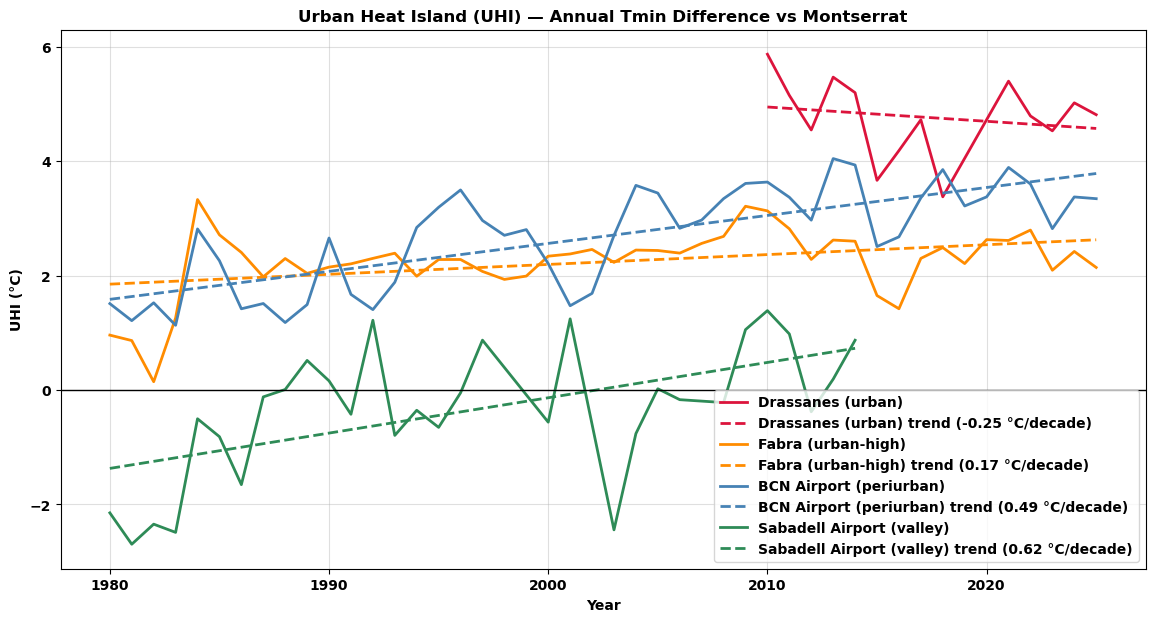

In [39]:
plt.figure(figsize=(14,7))

plot_uhi_with_trend(uhi_drassanes, "Drassanes (urban)", color="crimson")
plot_uhi_with_trend(uhi_fabra, "Fabra (urban-high)", color="darkorange")
plot_uhi_with_trend(uhi_bcn_airport, "BCN Airport (periurban)", color="steelblue")
plot_uhi_with_trend(uhi_sabadell, "Sabadell Airport (valley)", color="seagreen")

plt.axhline(0, color="black", linewidth=1)
plt.title("Urban Heat Island (UHI) — Annual Tmin Difference vs Montserrat")
plt.xlabel("Year")
plt.ylabel("UHI (°C)")
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()


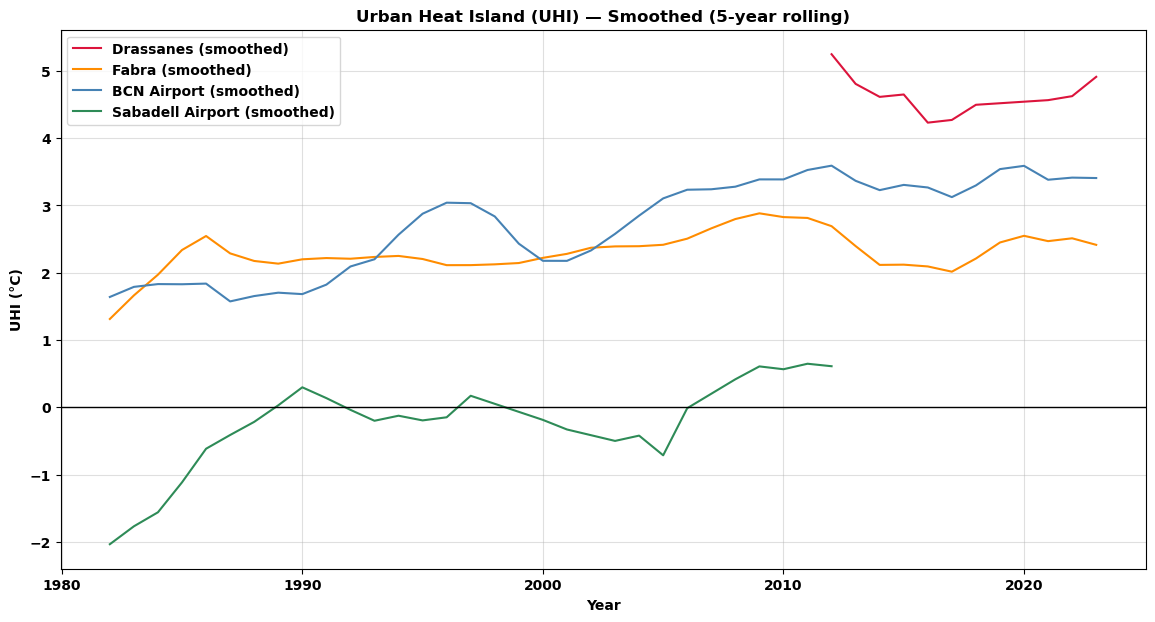

In [40]:
def rolling_uhi(uhi_df, window=5):
    df = uhi_df.copy()
    df = df.sort_values("year")
    df["UHI_roll"] = df["UHI"].rolling(window, center=True).mean()
    return df

# Crear series suavizadas
uhi_drassanes_s = rolling_uhi(uhi_drassanes)
uhi_fabra_s = rolling_uhi(uhi_fabra)
uhi_bcn_airport_s = rolling_uhi(uhi_bcn_airport)
uhi_sabadell_s = rolling_uhi(uhi_sabadell)

plt.figure(figsize=(14,7))

plt.plot(uhi_drassanes_s["year"], uhi_drassanes_s["UHI_roll"], label="Drassanes (smoothed)", color="crimson")
plt.plot(uhi_fabra_s["year"], uhi_fabra_s["UHI_roll"], label="Fabra (smoothed)", color="darkorange")
plt.plot(uhi_bcn_airport_s["year"], uhi_bcn_airport_s["UHI_roll"], label="BCN Airport (smoothed)", color="steelblue")
plt.plot(uhi_sabadell_s["year"], uhi_sabadell_s["UHI_roll"], label="Sabadell Airport (smoothed)", color="seagreen")

plt.axhline(0, color="black", linewidth=1)
plt.title("Urban Heat Island (UHI) — Smoothed (5-year rolling)")
plt.xlabel("Year")
plt.ylabel("UHI (°C)")
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot UHI subplot with trend line
def plot_uhi_subplot(uhi_df, station_label, ax):
    df = uhi_df.dropna(subset=["UHI"]).sort_values("year")
    years = df["year"].values
    values = df["UHI"].values
    
    # Linear trend calculation
    slope, intercept = np.polyfit(years, values, 1)
    trend = slope * years + intercept
    
    # Serie UHI
    ax.plot(years, values, label="UHI", linewidth=1.8)
    # Trend line
    ax.plot(years, trend, linestyle="--", linewidth=1.8,
            label=f"Trend ({slope*10:.2f} °C/decade)")
    
    ax.axhline(0, linewidth=1)
    ax.set_title(station_label)
    ax.set_xlabel("Year")
    ax.set_ylabel("UHI (°C)")
    ax.grid(True, alpha=0.4)
    ax.legend(fontsize=8)


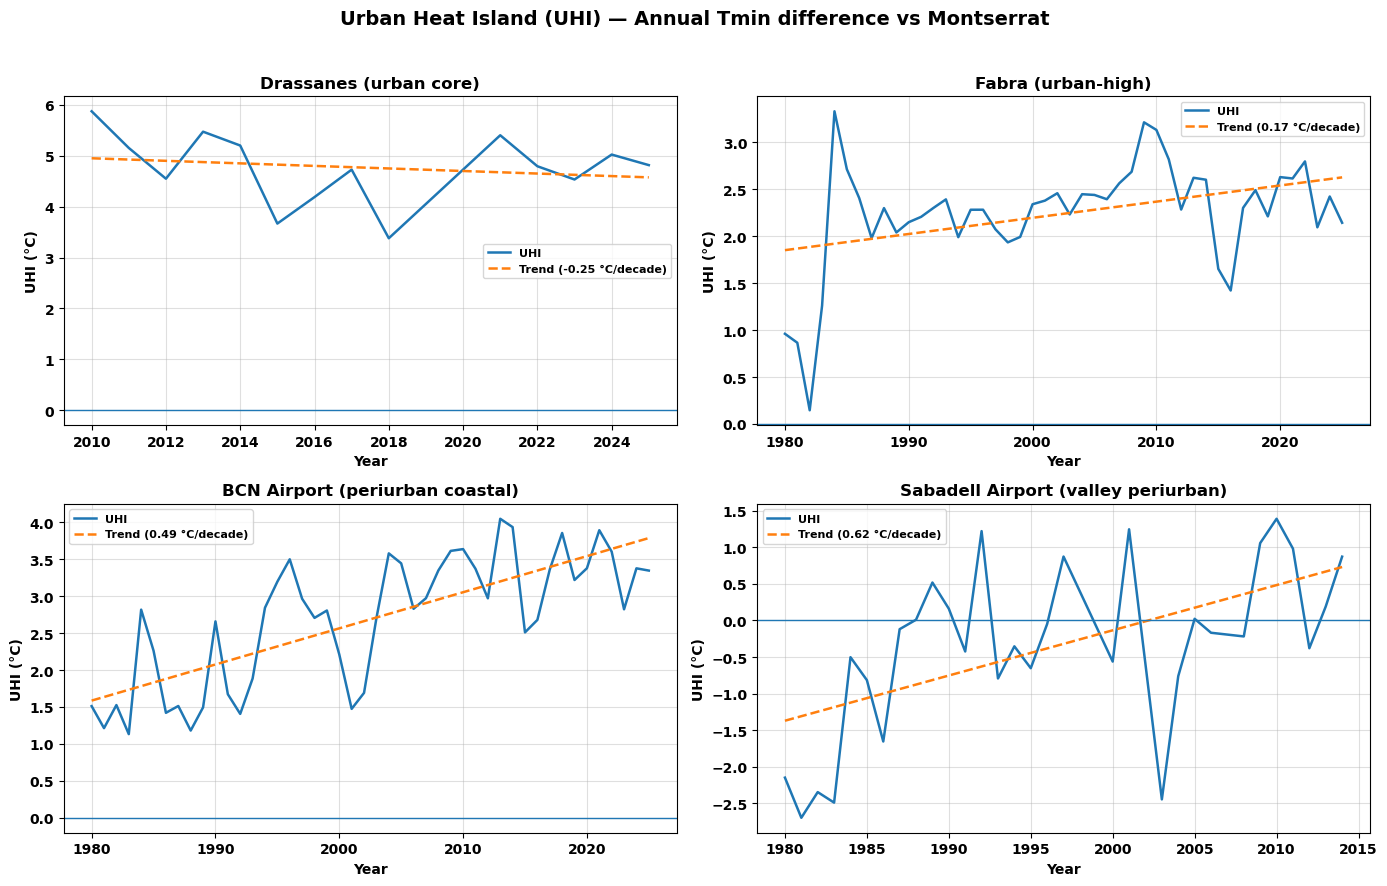

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=False, sharey=False)

plot_uhi_subplot(uhi_drassanes, "Drassanes (urban core)", axes[0, 0])
plot_uhi_subplot(uhi_fabra, "Fabra (urban-high)", axes[0, 1])
plot_uhi_subplot(uhi_bcn_airport, "BCN Airport (periurban coastal)", axes[1, 0])
plot_uhi_subplot(uhi_sabadell, "Sabadell Airport (valley periurban)", axes[1, 1])

fig.suptitle("Urban Heat Island (UHI) — Annual Tmin difference vs Montserrat", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [43]:
# Function to compute rolling mean of UHI
def rolling_uhi(uhi_df, window=5):
    df = uhi_df.copy().sort_values("year")
    df["UHI_roll"] = df["UHI"].rolling(window=window, center=True).mean()
    return df


uhi_drassanes_s = rolling_uhi(uhi_drassanes)
uhi_fabra_s = rolling_uhi(uhi_fabra)
uhi_bcn_airport_s = rolling_uhi(uhi_bcn_airport)
uhi_sabadell_s = rolling_uhi(uhi_sabadell)



In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot UHI smoothed subplot with trend line
def plot_uhi_smoothed_subplot(uhi_df, station_label, ax):
    df = uhi_df.dropna(subset=["UHI_roll"]).sort_values("year")
    years = df["year"].values
    values = df["UHI_roll"].values
    
    # Lineal trend calculation over smoothed series
    slope, intercept = np.polyfit(years, values, 1)
    trend = slope * years + intercept
    
    # Plot smoothed UHI series
    ax.plot(years, values, label="Smoothed UHI (5-year)", linewidth=2)
    
    # Plot tendency
    ax.plot(years, trend, linestyle="--", linewidth=2,
            label=f"Trend ({slope*10:.2f} °C/decade)")
    
    ax.axhline(0, color="black", linewidth=1)
    ax.set_title(station_label)
    ax.set_xlabel("Year")
    ax.set_ylabel("UHI (°C)")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)


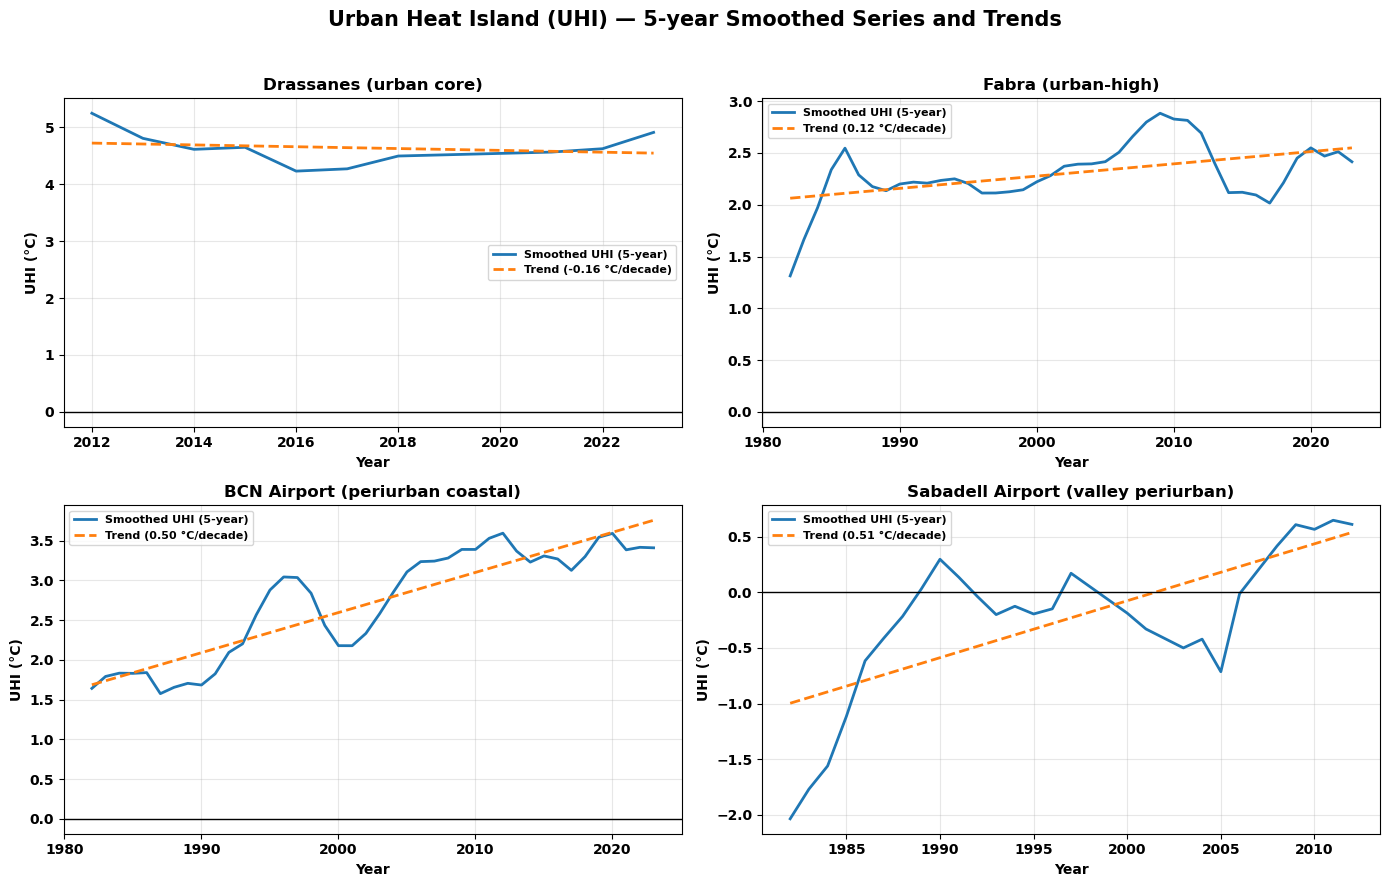

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=False, sharey=False)

plot_uhi_smoothed_subplot(uhi_drassanes_s, "Drassanes (urban core)", axes[0, 0])
plot_uhi_smoothed_subplot(uhi_fabra_s, "Fabra (urban-high)", axes[0, 1])
plot_uhi_smoothed_subplot(uhi_bcn_airport_s, "BCN Airport (periurban coastal)", axes[1, 0])
plot_uhi_smoothed_subplot(uhi_sabadell_s, "Sabadell Airport (valley periurban)", axes[1, 1])

fig.suptitle("Urban Heat Island (UHI) — 5-year Smoothed Series and Trends", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [47]:
# Adding Annual Temperature Range (DTR or ATD) to annual temp dataframe
annual_temp["ATD"] = annual_temp["tmax"] - annual_temp["tmin"]


# Function to merge UHI data with annual temperature data
def merge_uhi_with_temp(uhi_df, annual_df, station_name):
    urb = annual_df[annual_df["nombre"] == station_name][["year","tmin","tmax","tmed","ATD"]]
    merged = pd.merge(uhi_df, urb, on="year", how="inner")
    return merged

uhi_drassanes_t = merge_uhi_with_temp(uhi_drassanes, annual_temp, "BARCELONA, DRASSANES")
uhi_fabra_t = merge_uhi_with_temp(uhi_fabra, annual_temp, "BARCELONA, FABRA")
uhi_bcn_airport_t = merge_uhi_with_temp(uhi_bcn_airport, annual_temp, "BARCELONA AEROPUERTO")
uhi_sabadell_t = merge_uhi_with_temp(uhi_sabadell, annual_temp, "SABADELL AEROPUERTO")



In [49]:
from scipy.stats import pearsonr
# Function to compute correlations between UHI and temperature variables

def correlations_temp_vars(df, station_label):
    df = df.dropna()

    r_tmin, p_tmin = pearsonr(df["tmin"], df["UHI"])
    r_tmax, p_tmax = pearsonr(df["tmax"], df["UHI"])
    r_tmed, p_tmed = pearsonr(df["tmed"], df["UHI"])
    r_atd,  p_atd  = pearsonr(df["ATD"],  df["UHI"])

    return {
        "Station": station_label,
        "r(UHI, Tmin)": round(r_tmin, 3),
        "p(UHI, Tmin)": round(p_tmin, 4),

        "r(UHI, Tmax)": round(r_tmax, 3),
        "p(UHI, Tmax)": round(p_tmax, 4),

        "r(UHI, Tmed)": round(r_tmed, 3),
        "p(UHI, Tmed)": round(p_tmed, 4),

        "r(UHI, ATD)": round(r_atd, 3),
        "p(UHI, ATD)": round(p_atd, 4),

        "N years": len(df)
    }



In [ ]:
# Compute correlations for each station
corr_temp_df = pd.DataFrame([
    correlations_temp_vars(uhi_drassanes_t, "Drassanes (urban core)"),
    correlations_temp_vars(uhi_fabra_t, "Fabra (urban-high)"),
    correlations_temp_vars(uhi_bcn_airport_t, "BCN Airport"),
    correlations_temp_vars(uhi_sabadell_t, "Sabadell Airport"),
])

corr_temp_df


,Station,"r(UHI, Tmin)","p(UHI, Tmin)","r(UHI, Tmax)","p(UHI, Tmax)","r(UHI, Tmed)","p(UHI, Tmed)","r(UHI, ATD)","p(UHI, ATD)",N years
0,Drassanes (urban core),0.174,0.5509,-0.186,0.5243,0.165,0.5730,-0.596,0.0245,14
1,Fabra (urban-high),0.349,0.0176,0.081,0.5947,0.209,0.1639,-0.407,0.0050,46
2,BCN Airport,0.747,0.0000,0.562,0.0000,0.695,0.0000,-0.715,0.0000,46
3,Sabadell Airport,0.824,0.0000,0.385,0.0326,0.692,0.0000,-0.639,0.0001,31


🌇 2. Interpretación estación por estación 
⭐ Drassanes (urban core)

Correlaciones con temperaturas muy bajas y no significativas (r≈0.17).

ATD tiene una correlación negativa moderada-fuerte (r = –0.60, p ≈ 0.02).

📌 Interpretación:
La UHI en el centro urbano no depende directamente de la variabilidad térmica anual (Tmin/Tmax/Tmed).
Está dominada por:

geometría urbana (cañones de calle)

materiales termoinerciales

calor antropogénico

Sin embargo:
👉 Cuando la amplitud térmica diaria baja (ATD ↓), la UHI se intensifica (UHI ↑).
Esto es totalmente coherente: un centro urbano reduce la capacidad de enfriamiento nocturno.

⭐ Fabra (urban-high)

Relación moderada entre UHI y Tmin (r = 0.35, p < 0.02).

Tmax casi no influye (r = 0.081).

ATD tiene correlación negativa significativa (r = –0.41, p ≈ 0.005).

📌 Interpretación:
Fabra muestra un patrón más climatológico y menos urbano.
La UHI aquí es suave, y depende más de:

la variabilidad nocturna (Tmin)

condiciones atmosféricas de estabilidad

enfriamiento por elevación

La relación ATD → UHI es clara:
👉 si la noche no enfría mucho, la UHI aumenta en Fabra.

⭐ Barcelona Airport (periurban coastal)

📌 Resultados brutales y esperados físicamente:

UHI vs Tmin: r = 0.75, muy fuerte, p = 0.000

UHI vs Tmax: r = 0.56, fuerte, p = 0.000

UHI vs Tmed: r = 0.69, fuerte, p = 0.000

UHI vs ATD: r = –0.71, fuerte negativa, p = 0.000

👉 Barcelona Airport muestra el patrón físico más claro y limpio de todos.

Aquí la UHI:

aumenta cuando aumentan las mínimas (Tmin ↑)

aumenta cuando las noches enfrían menos (ATD ↓)

responde tanto a variabilidad climática como urbana

El aeropuerto es ideal como estación periurbana para estudios UHI.

⭐ Sabadell Airport (valley)

UHI vs Tmin: r = 0.82, muy fuerte

UHI vs Tmax: r = 0.38 (significativa pero moderada)

UHI vs Tmed: r = 0.69, fuerte

UHI vs ATD: r = –0.64, fuerte negativa

📌 Interpretación física:

Sabadell está en un valle →
inversiones térmicas y acumulación de aire frío.

Cuando la noche es estable (ATD baja), el aire frío rural se acumula →
➡ Montserrat enfría muchísimo más que Sabadell → UHI crece intensamente.

Este patrón concuerda perfectamente con la física del Vallès.

🧊 3. Explicación científica rápida: ¿por qué ATD se correlaciona tan fuerte con UHI?
ATD = Tmax – Tmin

La UHI es casi exclusivamente un fenómeno nocturno, porque:

las superficies urbanas acumulan calor durante el día

lo liberan lentamente por la noche, reduciendo el enfriamiento nocturno

por eso Tmin urbana sube más que Tmin rural

Cuando ATD es baja significa:

la noche no enfría suficiente → Tmin más alta

lo cual es exactamente lo que incrementa UHI

Por eso la correlación UHI–ATD es:

👉 negativa fuerte en todas las estaciones (–0.40 a –0.71)

Es uno de los resultados clave.

🧠 4. Conclusiones globales 

The Pearson correlation analysis shows that UHI intensity is strongly linked to nighttime thermal behavior.
Tmin and ATD are the primary drivers of UHI, especially in periurban and valley stations.
Urban-core areas such as Drassanes show almost no correlation with thermal variables, indicating that geometric and anthropogenic factors dominate the nocturnal heat retention.
ATD presents a consistently strong negative correlation with UHI across all stations, confirming that reduced nighttime cooling is a key mechanism of UHI formation in the Barcelona region.

In [51]:
import seaborn as sns

# Function to create scatter plot of UHI vs variable with regression line and stats
def scatter_uhi_vs_var(df, station_label, var_col, var_label):
    # Clean data
    df = df.dropna(subset=[var_col, "UHI"])

    x = df[var_col]
    y = df["UHI"]

    # Pearson correlation
    r, p = pearsonr(x, y)

    # Plot
    plt.figure(figsize=(6,4))

    sns.regplot(
        x=x,
        y=y,
        scatter_kws={"s": 45},
        line_kws={"color": "blue", "linewidth": 2}
    )

    plt.title(f"UHI vs {var_label} — {station_label}")
    plt.xlabel(f"{var_label}")
    plt.ylabel("UHI (°C)")
    plt.grid(True, alpha=0.3)

    # Add box with stats
    stats_text = f"r = {r:.2f}\np = {p:.3f}"
    plt.gca().text(
        0.05, 0.95,
        stats_text,
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray")
    )
    
    TEMP_DIR = os.path.join(os.path.dirname(os.getcwd()), "reports", "temp")
    os.makedirs(TEMP_DIR, exist_ok=True)
    filename = f"UHI_vs_{var_col.replace(' ', '_')}_{station_label.replace(',', '').replace(' ', '_')}.png"
    save_path_temp = os.path.join(TEMP_DIR, filename)
    plt.savefig(save_path_temp, dpi=300, bbox_inches="tight")
    plt.show()


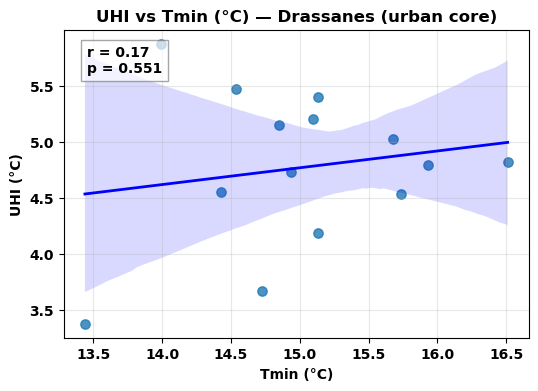

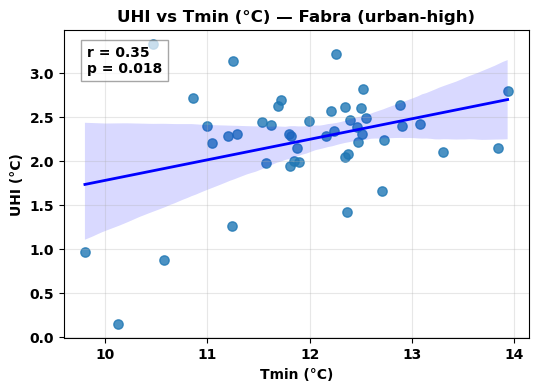

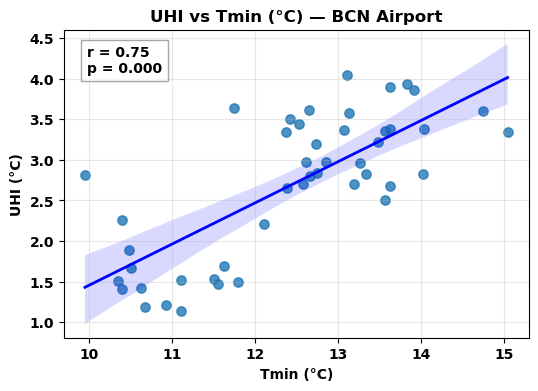

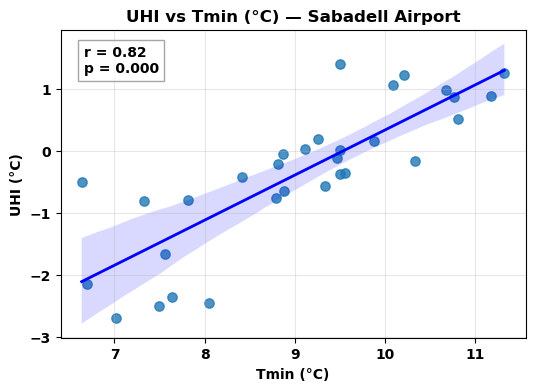

In [ ]:
# Scatter plots UHI vs Tmin
scatter_uhi_vs_var(uhi_drassanes_t, "Drassanes (urban core)", "tmin", "Tmin (°C)")
scatter_uhi_vs_var(uhi_fabra_t, "Fabra (urban-high)", "tmin", "Tmin (°C)")
scatter_uhi_vs_var(uhi_bcn_airport_t, "BCN Airport", "tmin", "Tmin (°C)")
scatter_uhi_vs_var(uhi_sabadell_t, "Sabadell Airport", "tmin", "Tmin (°C)")


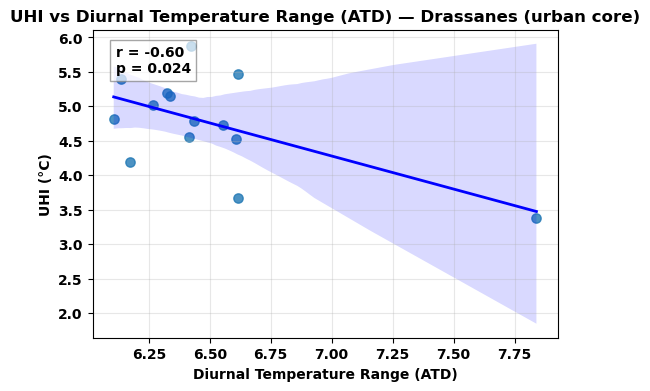

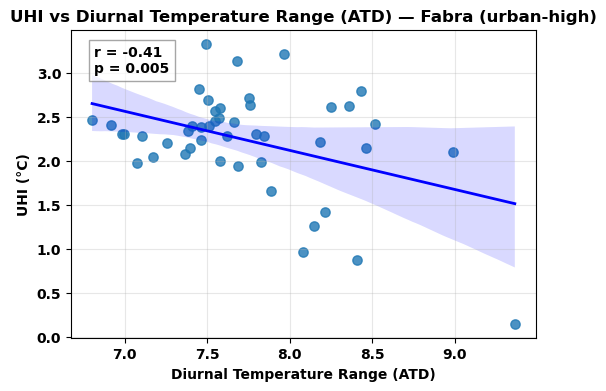

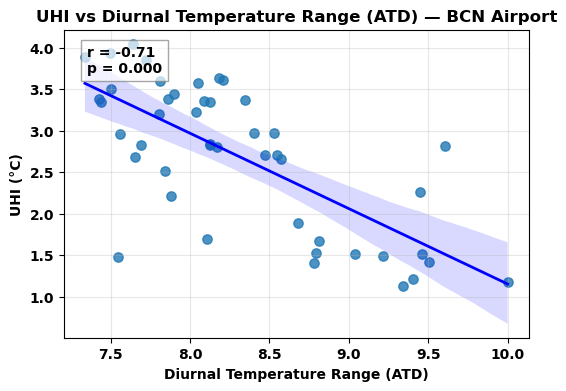

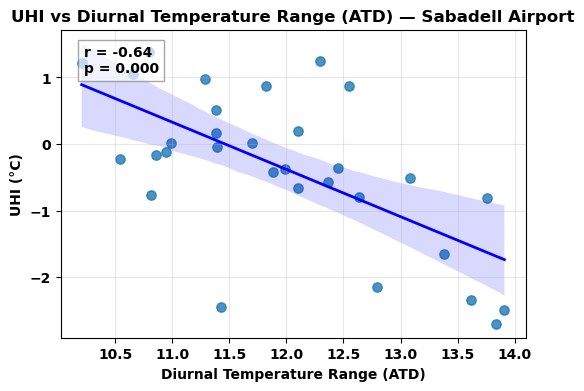

In [53]:
# Scatter UHI vs Tmax
scatter_uhi_vs_var(uhi_drassanes_t, "Drassanes (urban core)", "ATD", "Diurnal Temperature Range (ATD)")
scatter_uhi_vs_var(uhi_fabra_t, "Fabra (urban-high)", "ATD", "Diurnal Temperature Range (ATD)")
scatter_uhi_vs_var(uhi_bcn_airport_t, "BCN Airport", "ATD", "Diurnal Temperature Range (ATD)")
scatter_uhi_vs_var(uhi_sabadell_t, "Sabadell Airport", "ATD", "Diurnal Temperature Range (ATD)")


🌡️ 1. ¿Qué representan los gráficos?

Cada punto representa un año con dos valores:

el valor medio anual de Tmin (o ATD)

el valor medio anual de UHI

Por ejemplo:

Si en 1995 Fabra tuvo Tmin = 12.4 °C y UHI = 2.3 °C → aparece un punto en (12.4, 2.3)

Estos gráficos no están ordenados en el eje temporal:
son relaciones entre variables, no series temporales.

📈 2. Por qué la línea puede subir o bajar

La línea azul es la recta de regresión lineal, que resume la tendencia general entre las dos variables:

🔼 Si la línea sube (pendiente positiva)

→ Cuando la variable aumenta, la UHI también aumenta.

Ejemplo: en Fabra:

Tmin ↑ → UHI ↑
(r = +0.35, significativo)

Interpretación física:

años más cálidos por la noche → menos enfriamiento → UHI más fuerte.

🔽 Si la línea baja (pendiente negativa)

→ Cuando la variable aumenta, la UHI disminuye.

Ejemplo: en Fabra (ATD):

ATD ↑ → UHI ↓
(r = –0.41, significativo)

Interpretación física:

cuando la noche enfría bien (ATD grande), UHI baja

cuando la noche casi no enfría (ATD pequeña), UHI sube

Este es un comportamiento típico de climas mediterráneos.

🔢 3. ¿Qué significa el coeficiente r (correlación de Pearson)?

r cuantifica cuán linealmente relacionadas están las dos variables.

🔢 3. ¿Qué significa el coeficiente r (correlación de Pearson)?

r cuantifica cuán linealmente relacionadas están las dos variables.

| Valor de r | Interpretación             |
| ---------- | -------------------------- |
| +1.0       | Relación positiva perfecta |
| +0.7       | Relación positiva fuerte   |
| +0.3       | Relación positiva débil    |
| 0          | Sin relación lineal        |
| –0.3       | Relación negativa débil    |
| –0.7       | Relación negativa fuerte   |
| –1.0       | Relación negativa perfecta |

Fabra – UHI vs Tmin → r = +0.35

➡ Correlación moderada
➡ Años con mayor Tmin → tienden a tener mayor UHI

Fabra – UHI vs ATD → r = –0.41

➡ Correlación moderada-negativa
➡ Cuando el rango térmico diario aumenta → UHI disminuye
➡ Confirmación de la física nocturna del enfriamiento urbano y rural.

🧪 4. ¿Qué significa el p-value?

El p-value indica si la correlación puede considerarse estadísticamente significativa.

Interpretación estándar:

p < 0.05 → resultado significativo
→ hay evidencia fuerte de que existe relación real

p ≥ 0.05 → no significativo
→ el patrón podría deberse al azar o a variabilidad natural

Tus ejemplos:
Fabra – UHI vs Tmin

r = 0.35

p = 0.018
➡ Significativo
➡ La relación es real, no aleatoria.

Fabra – UHI vs ATD

r = –0.41

p = 0.005
➡ Muy significativo
➡ ATD es un predictor claro de UHI en Fabra.

🔍 5. ¿Qué significa la nube de puntos?

Si los puntos están alineados alrededor de la línea → correlación fuerte.

Si están muy dispersos → correlación baja.

Si la nube forma un patrón inclinado hacia arriba → relación positiva.

Hacia abajo → relación negativa.

Sin forma → relación inexistente.

En Fabra:

UHI vs Tmin

La nube está inclinada hacia arriba → relación positiva.

UHI vs ATD

La nube baja → relación negativa clara.

🧠 6. Interpretación física resumida 
🔥 UHI vs Tmin

Years with higher nighttime temperatures tend to exhibit stronger UHI intensity.
This indicates that UHI at Fabra is partly controlled by the degree of nocturnal cooling.

❄ UHI vs ATD

When the diurnal temperature range increases (indicating stronger nighttime cooling), the UHI weakens.
In contrast, reduced nighttime cooling (low ATD) enhances UHI.
This relationship is statistically significant and physically consistent with UHI theory.